In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time as time
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [41]:
data_path = '/media/disk/erc/papers/2019_ML_OCN/data/raph_temp_data_NA/'

# Import data
X = pd.read_csv(f"{data_path}X_INPUT_LOG_PCA_NA.csv").iloc[:, 2:]
y = pd.read_csv(f"{data_path}Y_OUTPUT_LOG_NA.csv").iloc[:, 2:]

# y = np.exp(y)

In [42]:
y.shape

(3181, 276)

In [43]:
y.describe()

,1,3,5,7,9,11,13,15,17,19,...,955,960,965,970,975,980,985,990,995,1000
count,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,...,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000
mean,-2.900663,-2.898407,-2.895640,-2.891294,-2.886683,-2.883220,-2.880841,-2.879046,-2.878439,-2.878442,...,-3.591383,-3.591066,-3.589926,-3.588963,-3.587449,-3.589363,-3.591955,-3.596240,-3.599698,-3.602358
std,0.358795,0.361310,0.363517,0.365821,0.366232,0.366527,0.366901,0.366984,0.366933,0.365515,...,0.183568,0.180024,0.180462,0.178927,0.179459,0.183057,0.183960,0.187008,0.189023,0.189302
min,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,...,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000
25%,-3.193820,-3.200659,-3.200659,-3.200659,-3.193820,-3.200659,-3.196231,-3.200659,-3.200659,-3.200659,...,-3.698970,-3.698970,-3.698970,-3.698970,-3.698970,-3.698970,-3.698970,-3.706795,-3.717453,-3.721246
50%,-2.870632,-2.869666,-2.864867,-2.856985,-2.855426,-2.847712,-2.844664,-2.838632,-2.834813,-2.835647,...,-3.602060,-3.602060,-3.602060,-3.602060,-3.602060,-3.602060,-3.602060,-3.619789,-3.619789,-3.619789
75%,-2.617983,-2.614394,-2.609065,-2.605548,-2.600326,-2.595166,-2.591760,-2.591760,-2.591760,-2.590913,...,-3.455932,-3.455932,-3.455932,-3.455932,-3.455932,-3.455932,-3.455932,-3.455932,-3.455932,-3.455932
max,-1.937794,-1.917933,-1.845044,-1.831797,-1.862329,-1.843754,-1.843754,-1.843754,-1.843754,-1.877456,...,-1.730487,-2.202145,-2.158015,-2.232432,-2.402766,-2.311306,-2.311306,-2.311306,-2.311306,-2.311306


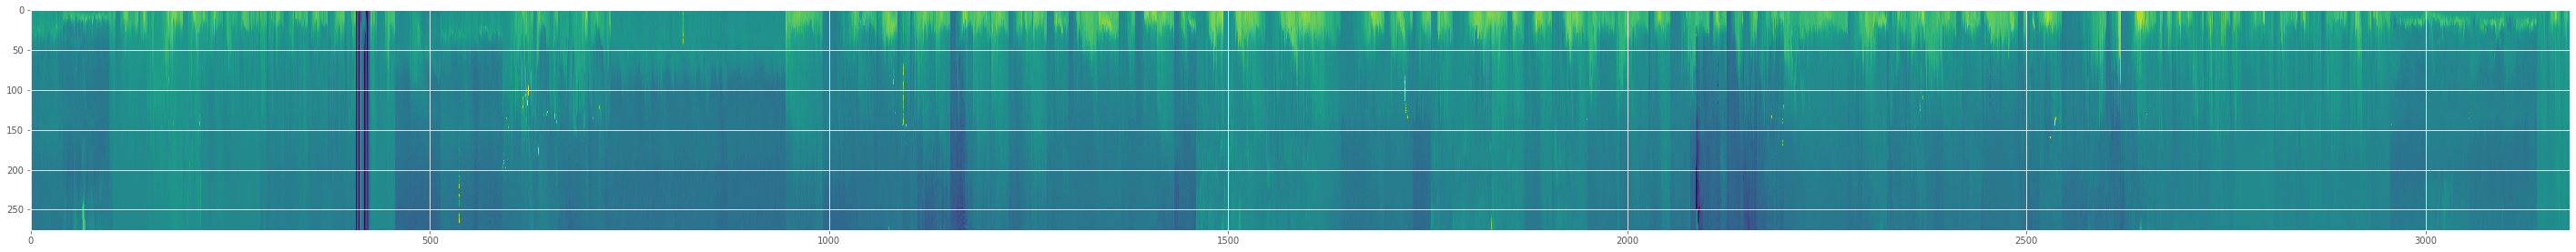

In [44]:
plt.figure(figsize=(50,50))
plt.imshow(y.T)
# plt.xticks(labels=y.columns.values)
plt.show()

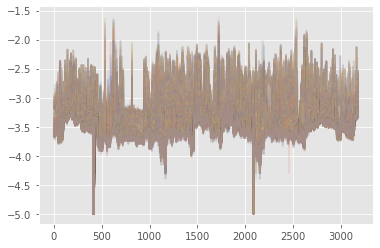

In [45]:
plt.figure()
plt.plot(y, alpha=0.1)
# plt.xticks(labels=y.columns.values)
plt.show()

In [46]:
X.shape, y.shape

((3181, 17), (3181, 276))

### Training and Testing

In [47]:
# training and testing split
train_size = 0.8
random_state = 123

xtrain, xtest, ytrain, ytest = train_test_split(
    X, y, train_size=train_size, random_state=random_state
)

In [48]:
# Standardize Inputs (per dimension)
x_mean, x_std = xtrain.mean(axis=0), xtrain.std(axis=0)

xtrain_norm = (xtrain - x_mean) / x_std
xtest_norm = (xtest - x_mean) / x_std

# Normalize Outputs
y_mean = ytrain.mean(axis=0)

ytrain_norm = ytrain - y_mean
ytest_norm = ytest - y_mean

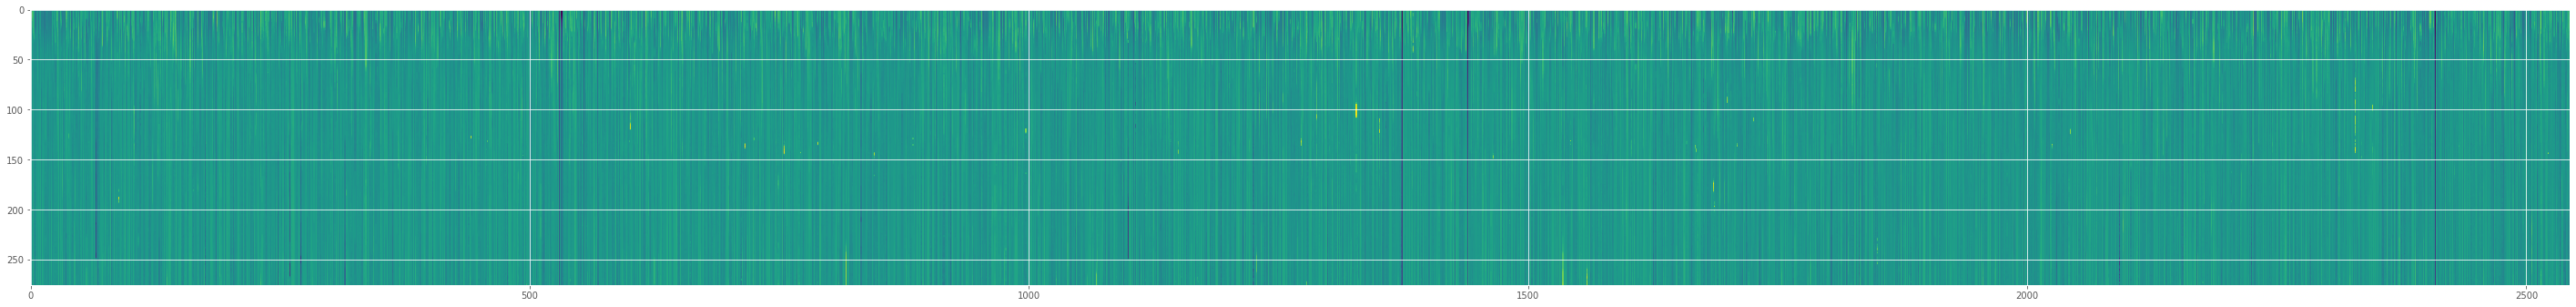

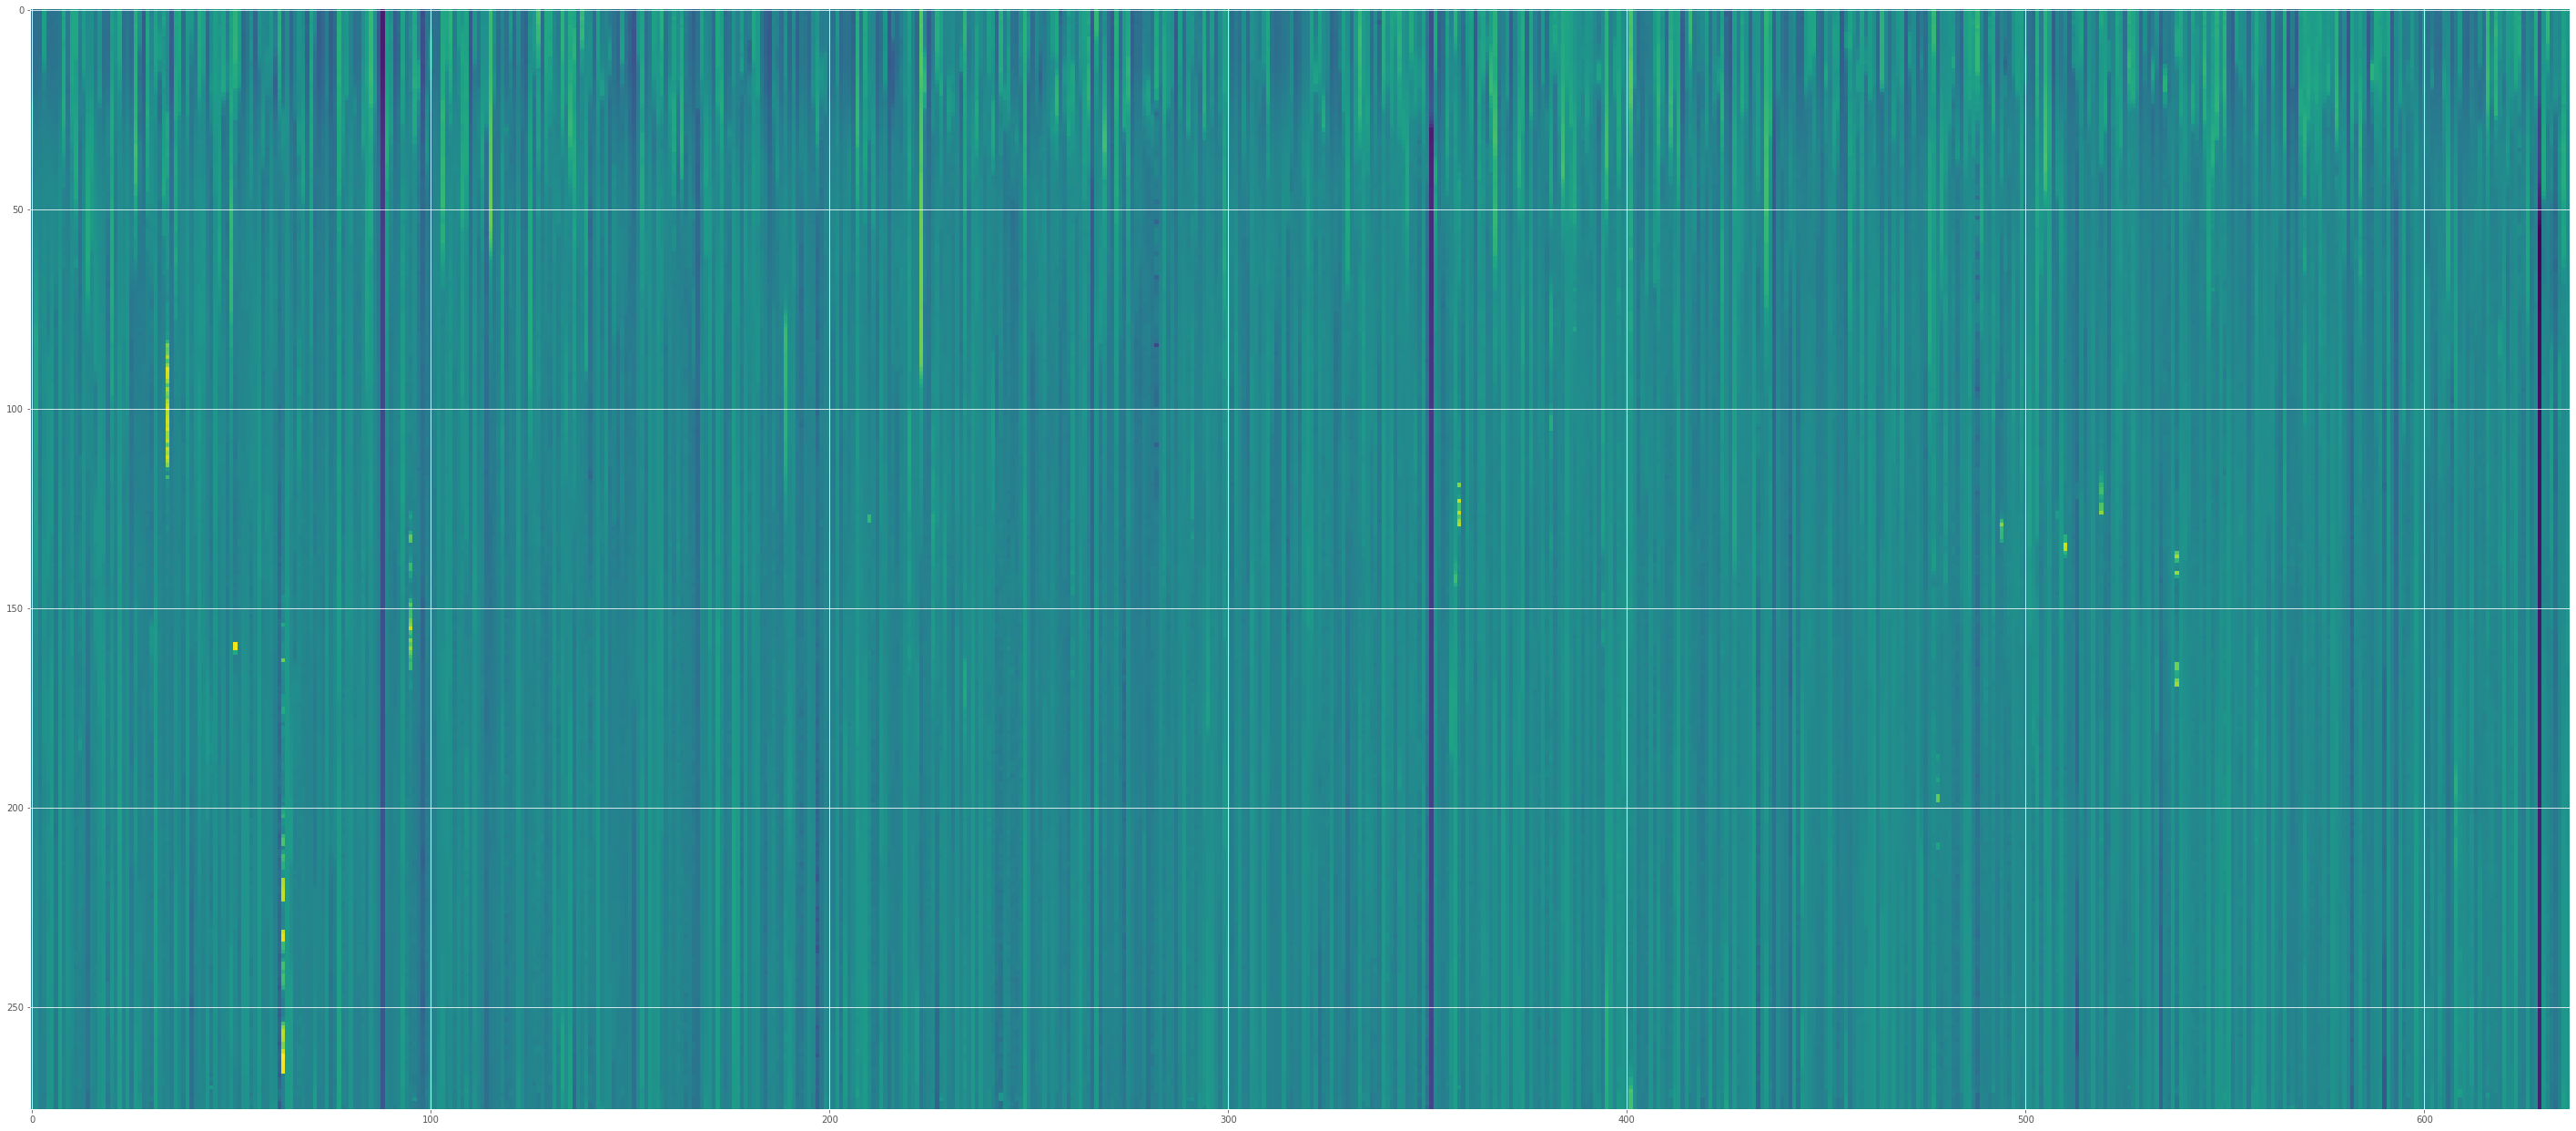

In [50]:
plt.figure(figsize=(50,50))
plt.imshow(ytrain_norm.T)
# plt.xticks(labels=y.columns.values)
plt.show()

plt.figure(figsize=(50,50))
plt.imshow(ytest_norm.T)
# plt.xticks(labels=y.columns.values)
plt.show()

In [6]:
n_components = 20

pca_model = PCA(n_components=n_components)

ytrain_red = pca_model.fit_transform(ytrain_norm)
ytest_red = pca_model.transform(ytest_norm)

In [7]:
class BayesianModel:
    def __init__(self):
        self.model
        
    def fit(self, X, y):
        self.model.fit(X, y)
        self.std = np.std(self.model.predict(X) - y)
        
    def predict(self, X):
        pred_mean = self.model.predict(X)
        pred_std = np.ones_like(pred_mean) * (self.std + 1e-6) ** 2
        
class MOBayesianModel:
    def __init__(self):
        self.model
        
    def fit(self, X, y):
        self.model.fit(X, y)
        self.std = np.std(self.model.predict(X) - y)
        
    def predict(self, X):
        preds = list()
        for imodel in self.model:
            preds = imodel.predict(X)
            preds.append(pred)
        mean = np.array(preds).mean(axis=0)[:, None]
        var = np.array(preds).var(axis=0)[:, None]
        return mean, var

### Model I - Random Forest Regressor

In [8]:
rf_model = RandomForestRegressor(
    n_estimators=1000, 
    criterion='mse',
    n_jobs=-1,
    random_state=123,
    warm_start=False,
    verbose=0
)

t0 = time.time()
rf_model.fit(xtrain_norm, ytrain_red)
t1 = time.time() - t0

print(
    f"Training Time: {t1:.3f} seconds"
)

Training Time: 3.397 seconds


In [9]:
# Predictions
t0 = time.time()
ypred_red = rf_model.predict(xtest_norm)
t1 = time.time() - t0
ypred = pca_model.inverse_transform(ypred_red)


# Get Average Stats
mae = mean_absolute_error(ytest_norm, ypred, multioutput='uniform_average')
mse = mean_squared_error(ytest_norm, ypred, multioutput='uniform_average')
rmse = np.sqrt(mse)
r2 = r2_score(ytest_norm, ypred, multioutput='uniform_average')
print(
    f"MAE: {mae:.3f}\nMSE: {mse:.3f}\nRMSE: {rmse:.3f}\nR2: {r2:.3f}" 
    f" \nTime: {t1:.3} seconds"
)

MAE: 0.076
MSE: 0.016
RMSE: 0.125
R2: 0.575 
Time: 0.309 seconds


In [10]:
# Get Stats per Depth
mae_raw = mean_absolute_error(ytest_norm, ypred, multioutput='raw_values')
mse_raw = mean_squared_error(ytest_norm, ypred, multioutput='raw_values')
rmse_raw = np.sqrt(mse_raw)
r2_raw = r2_score(ytest_norm, ypred, multioutput='raw_values')

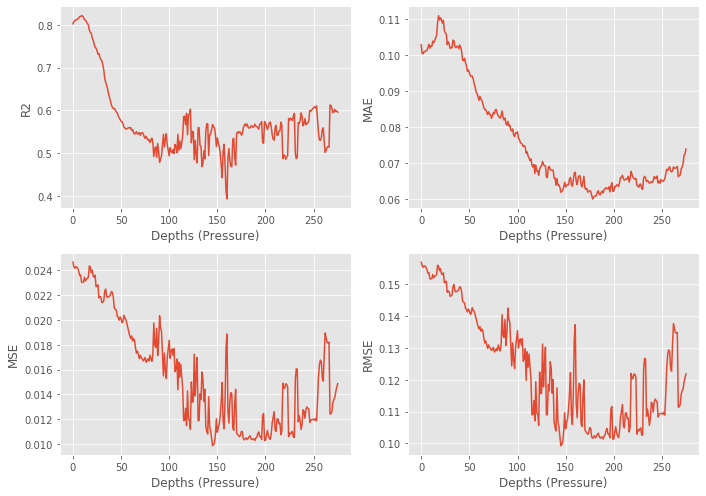

In [11]:
# Plots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

# R2 Values
ax[0,0].plot(r2_raw)
ax[0,0].set_xlabel('Depths (Pressure)')
ax[0,0].set_ylabel('R2')

# MAE
ax[0,1].plot(mae_raw)
ax[0,1].set_xlabel('Depths (Pressure)')
ax[0,1].set_ylabel('MAE')

# MSE
ax[1,0].plot(mse_raw)
ax[1,0].set_xlabel('Depths (Pressure)')
ax[1,0].set_ylabel('MSE')

# RMSE
ax[1,1].plot(rmse_raw)
ax[1,1].set_xlabel('Depths (Pressure)')
ax[1,1].set_ylabel('RMSE')


plt.tight_layout()
plt.show()

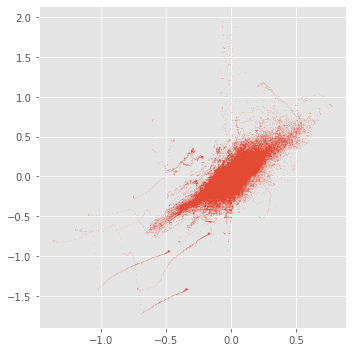

In [12]:
fig, ax = plt.subplots(figsize=(5,5))

plt.scatter(ypred, ytest_norm, alpha=0.1, s=0.5)
plt.tight_layout()
plt.show()

### Model - Extra Trees Regressor

In [185]:
from sklearn.ensemble import ExtraTreesRegressor

In [186]:
et_model = ExtraTreesRegressor(
    n_estimators=500, 
    criterion='mse',
    n_jobs=-1,
    random_state=123,
    warm_start=False,
    verbose=0
)

t0 = time.time()
et_model.fit(xtrain_norm, ytrain_red)
t1 = time.time() - t0

print(
    f"Training Time: {t1:.3f} seconds"
)

Training Time: 0.980 seconds


In [187]:
# Predictions
t0 = time.time()
ypred_red = et_model.predict(xtest_norm)
t1 = time.time() - t0
ypred = pca_model.inverse_transform(ypred_red)


# Get Average Stats
mae = mean_absolute_error(ytest_norm, ypred, multioutput='uniform_average')
mse = mean_squared_error(ytest_norm, ypred, multioutput='uniform_average')
rmse = np.sqrt(mse)
r2 = r2_score(ytest_norm, ypred, multioutput='uniform_average')
print(
    f"MAE: {mae:.3f}\nMSE: {mse:.3f}\nRMSE: {rmse:.3f}\nR2: {r2:.3f}" 
    f" \nTime: {t1:.3} seconds"
)

MAE: 0.072
MSE: 0.015
RMSE: 0.121
R2: 0.590 
Time: 0.208 seconds


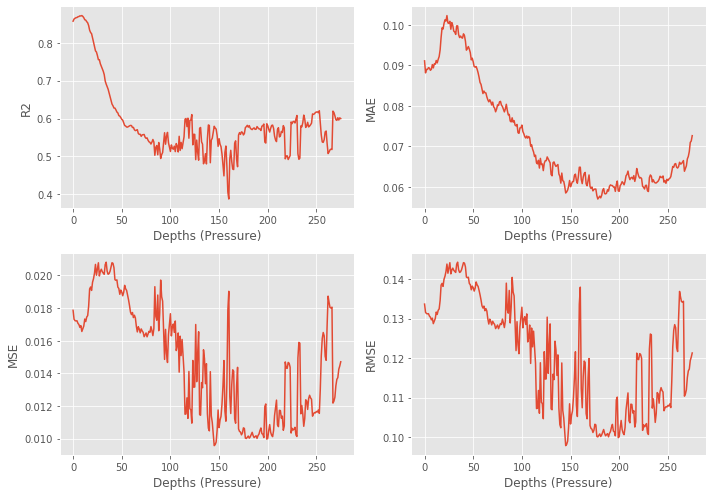

In [188]:
# Get Stats per Depth
mae_raw = mean_absolute_error(ytest_norm, ypred, multioutput='raw_values')
mse_raw = mean_squared_error(ytest_norm, ypred, multioutput='raw_values')
rmse_raw = np.sqrt(mse_raw)
r2_raw = r2_score(ytest_norm, ypred, multioutput='raw_values')

# Plots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

# R2 Values
ax[0,0].plot(r2_raw)
ax[0,0].set_xlabel('Depths (Pressure)')
ax[0,0].set_ylabel('R2')

# MAE
ax[0,1].plot(mae_raw)
ax[0,1].set_xlabel('Depths (Pressure)')
ax[0,1].set_ylabel('MAE')

# MSE
ax[1,0].plot(mse_raw)
ax[1,0].set_xlabel('Depths (Pressure)')
ax[1,0].set_ylabel('MSE')

# RMSE
ax[1,1].plot(rmse_raw)
ax[1,1].set_xlabel('Depths (Pressure)')
ax[1,1].set_ylabel('RMSE')


plt.tight_layout()
plt.show()

### MLP Regressor

In [43]:
from sklearn.neural_network import MLPRegressor

In [62]:
mlp_model = MLPRegressor(
    hidden_layer_sizes=150,
    activation='relu', 
    batch_size=200, 
    max_iter=5000,
    solver='adam', 
    verbose=False,
    warm_start=False,
    learning_rate='adaptive'
)

t0 = time.time()
mlp_model.fit(xtrain_norm, ytrain_red)
t1 = time.time() - t0

print(
    f"Training Time: {t1:.3f} seconds"
)

Training Time: 57.454 seconds


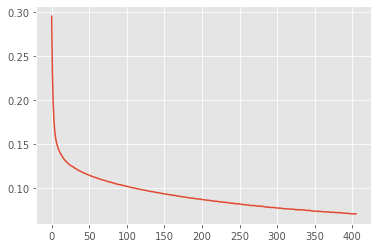

In [63]:
plt.plot(mlp_model.loss_curve_)

In [64]:
# Predictions
t0 = time.time()
ypred_red = mlp_model.predict(xtest_norm)
t1 = time.time() - t0
ypred = pca_model.inverse_transform(ypred_red)


# Get Average Stats
mae = mean_absolute_error(ytest_norm, ypred, multioutput='uniform_average')
mse = mean_squared_error(ytest_norm, ypred, multioutput='uniform_average')
rmse = np.sqrt(mse)
r2 = r2_score(ytest_norm, ypred, multioutput='uniform_average')
print(
    f"MAE: {mae:.3f}\nMSE: {mse:.3f}\nRMSE: {rmse:.3f}\nR2: {r2:.3f}" 
    f" \nTime: {t1:.3} seconds"
)

MAE: 0.088
MSE: 0.018
RMSE: 0.135
R2: 0.489 
Time: 0.0188 seconds


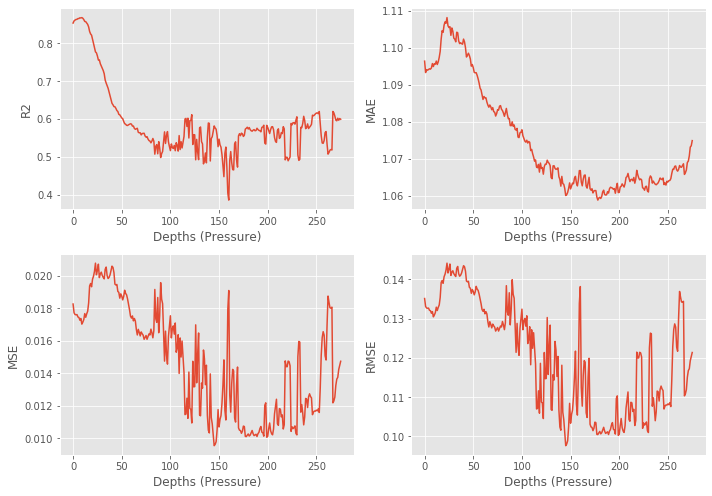

In [67]:
# Plots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

# R2 Values
ax[0,0].plot(r2_raw)
ax[0,0].set_xlabel('Depths (Pressure)')
ax[0,0].set_ylabel('R2')

# MAE
ax[0,1].plot(mae_raw)
ax[0,1].set_xlabel('Depths (Pressure)')
ax[0,1].set_ylabel('MAE')

# MSE
ax[1,0].plot(mse_raw)
ax[1,0].set_xlabel('Depths (Pressure)')
ax[1,0].set_ylabel('MSE')

# RMSE
ax[1,1].plot(rmse_raw)
ax[1,1].set_xlabel('Depths (Pressure)')
ax[1,1].set_ylabel('RMSE')


plt.tight_layout()
plt.show()